In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('results.csv')

In [10]:
data.sort_values('dev_f1', ascending=False)

,model_name,train_dataset,added_gold,distant,model_params,test_f1,test_precision,test_recall,corr_f1,corr_precision,corr_recall,dev_f1,dev_precision,dev_recall
112,bond,conll03,0.0,with_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.812531,0.823413,0.801932,0.822543,0.837569,0.808046,0.839580,0.862036,0.818265
121,bond,conll03,0.0,with_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.821592,0.828616,0.814686,0.829936,0.841204,0.818966,0.834507,0.846906,0.822466
139,bond,conll03,0.0,with_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.816715,0.837530,0.796908,0.826824,0.852033,0.803065,0.834409,0.868895,0.802557
162,bond,conll03,0.0,with_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.810464,0.815779,0.805217,0.819256,0.828566,0.810153,0.829500,0.846125,0.813516
96,bond,conll03,0.0,with_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.816793,0.812190,0.821449,0.824577,0.823867,0.825287,0.827844,0.827014,0.828676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,bond,conll03,0.0,with_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
86,bond,conll03,0.0,with_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
87,bond,conll03,0.0,with_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
88,bond,conll03,0.0,with_distant,"{'learning_rate': 5e-05, 'batch_size': 4, 'ber...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
import json
from pprint import pprint
pprint(json.loads(data.loc[121]['model_params'].replace("'", '"')))

{'batch_size': 4,
 'bert_dropout': 0.1,
 'end_updates': 1.0,
 'head_dropout': 0.3,
 'label_keep_threshold': 0.9,
 'learning_rate': 5e-05,
 'ner_fit_epochs': 1,
 'self_training_epochs': 2,
 'self_training_lr_proportion': 0.1,
 'start_updates': 2.0,
 'warmup_proportion': 0.5}


In [11]:
# hp analysis
from pprint import pprint
import json
grouped = data.drop('train_dataset', axis=1).groupby(['distant', 'model_name'])
for name, group in grouped:
    print(name)
    best_idx = group['dev_f1'].idxmax()
    pprint(json.loads(group['model_params'].loc[best_idx].replace("'", '"')))
    print(group.loc[best_idx])
    print('   ')

('with_distant', 'bond')
{'batch_size': 4,
 'bert_dropout': 0.1,
 'end_updates': 1.0,
 'head_dropout': 0.3,
 'label_keep_threshold': 0.9,
 'learning_rate': 5e-05,
 'ner_fit_epochs': 2,
 'self_training_epochs': 5,
 'self_training_lr_proportion': 0.1,
 'start_updates': 2.0,
 'warmup_proportion': 0.1}
model_name                                                     bond
added_gold                                                        0
distant                                                with_distant
model_params      {'learning_rate': 5e-05, 'batch_size': 4, 'ber...
test_f1                                                    0.812531
test_precision                                             0.823413
test_recall                                                0.801932
corr_f1                                                    0.822543
corr_precision                                             0.837569
corr_recall                                                0.808046
dev_f1              

In [ ]:
grouped = data.drop('train_dataset', axis=1).groupby(['distant', 'model_name'])

In [ ]:
stats = data.drop('train_dataset', axis=1).groupby(['distant', 'model_name', 'added_gold']).aggregate(['mean', 'median', 'std', 'count'])

In [88]:
distant_data = data[data['markup'] == 'distant']
normal_data = data[data['markup'] == 'None']
bond_data = data[data['model'] == 'bond']

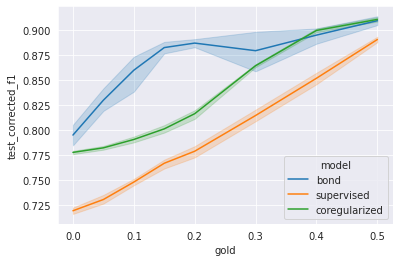

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=distant_data, x='gold', y='test_corrected_f1', hue='model')
plt.savefig('experiments/plots/distant_f1.png', dpi=1200)

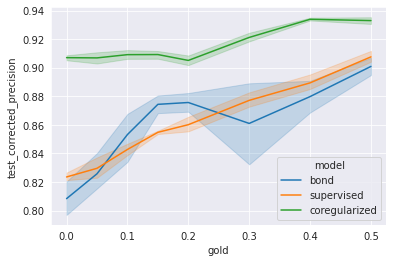

In [90]:
sns.lineplot(data=distant_data, x='gold', y='test_corrected_precision', hue='model')
plt.savefig('experiments/plots/distant_precision.png', dpi=1200)

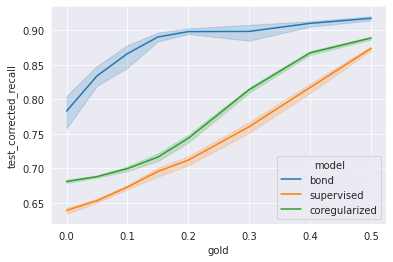

In [91]:
sns.lineplot(data=distant_data, x='gold', y='test_corrected_recall', hue='model')
plt.savefig('experiments/plots/distant_recall.png', dpi=1200)

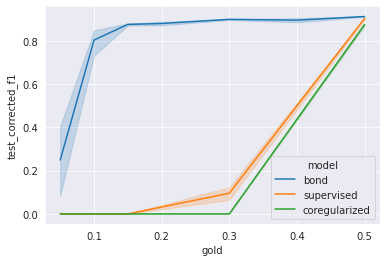

In [92]:
sns.lineplot(data=normal_data, x='gold', y='test_corrected_f1', hue='model')
plt.savefig('experiments/plots/normal_f1.png', dpi=1200)

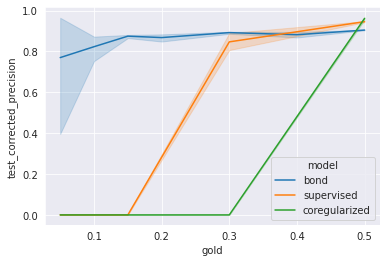

In [93]:
sns.lineplot(data=normal_data, x='gold', y='test_corrected_precision', hue='model')
plt.savefig('experiments/plots/normal_precision.png', dpi=1200)

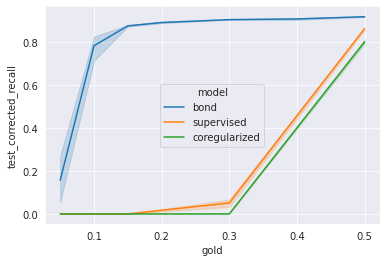

In [94]:
sns.lineplot(data=normal_data, x='gold', y='test_corrected_recall', hue='model')
plt.savefig('experiments/plots/normal_recall.png', dpi=1200)

In [95]:
dynet = pd.read_csv('dynet_results.csv')
dynet.columns = ['gold', 'test_f1', 'test_precision', 'test_recall']
for val_col in ['test_f1', 'test_precision', 'test_recall']:
    dynet[val_col] /= 100
dynet['markup'] = 'base_estimation'

In [96]:
bond_data = pd.concat([bond_data, dynet], ignore_index=True)
bond_data

,model,train_dataset,test_f1,test_precision,test_recall,test_corrected_f1,test_corrected_precision,test_corrected_recall,gold,markup
0,bond,conll03+0.0gold,0.773971,0.818685,0.733888,0.782116,0.831423,0.738329,0.00,distant
1,bond,conll03+0.0gold,0.799129,0.786854,0.811792,0.810970,0.802198,0.819937,0.00,distant
2,bond,conll03+0.1gold,0.846589,0.833305,0.860305,0.860639,0.851184,0.870305,0.10,distant
3,bond,conll03+0.1gold,0.860012,0.848527,0.871813,0.873445,0.865839,0.881186,0.10,distant
4,bond,conll03+0.15gold,0.873977,0.859466,0.888987,0.887213,0.876649,0.898034,0.15,distant
5,bond,conll03+0.15gold,0.871930,0.864047,0.879958,0.885976,0.882199,0.889786,0.15,distant
6,bond,conll03+0.5gold,0.889102,0.876484,0.902089,0.904050,0.895489,0.912776,0.50,distant
7,bond,conll03+0.5gold,0.901443,0.890617,0.912535,0.915425,0.908698,0.922253,0.50,distant
8,bond,conll03+0.05gold,0.839323,0.835203,0.843484,0.852154,0.852079,0.852229,0.05,distant
9,bond,conll03+0.05gold,0.819836,0.814323,0.825425,0.829495,0.827827,0.831169,0.05,distant


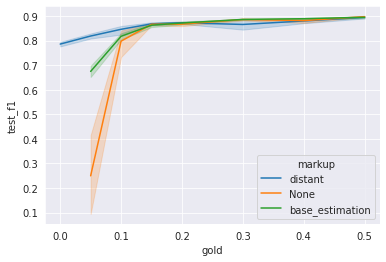

In [102]:
sns.lineplot(data=bond_data, x='gold', y='test_f1', hue='markup')
plt.savefig('experiments/plots/bond_f1.png', dpi=1200)

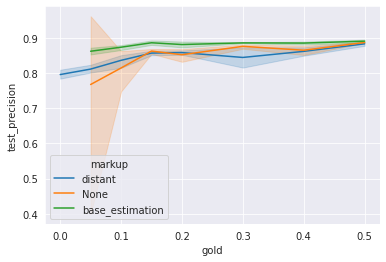

In [103]:
sns.lineplot(data=bond_data, x='gold', y='test_precision', hue='markup')
plt.savefig('experiments/plots/bond_precision.png', dpi=1200)

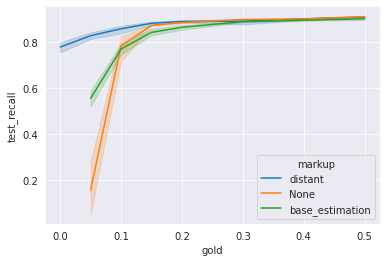

In [104]:
sns.lineplot(data=bond_data, x='gold', y='test_recall', hue='markup')
plt.savefig('experiments/plots/bond_recall.png', dpi=1200)

In [78]:
grouped.groups

{('None', 'bond'): [10, 11, 12, 13, 14, 15, 16, 17, 67, 70, 71, 72, 73, 74, 75, 76, 79, 80, 82, 83, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162], ('None', 'coregularized'): [46, 47, 48, 49, 50, 51, 52, 53, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131], ('None', 'supervised'): [38, 39, 40, 41, 42, 43, 44, 45, 106, 107, 109, 111, 112, 113, 114, 115, 116, 117, 118, 120], ('distant', 'bond'): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146], ('distant', 'coregularized'): [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 108, 110, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190], ('distant', 'supervised'): [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 77, 78, 81, 84, 85, 86, 87, 88, 89, 90, 91, 92, 160, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 1